In [10]:
# Import libraries 
import numpy as np 
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')
import ipywidgets as widgets 

# Two State State-Space Model 

$x_1(n+1) = A_f \cdot x_1(n) + B_f \cdot e(n)$

$x_2(n+1) = A_s \cdot x_2(n) + B_s \cdot e(n)$

$B_f > B_s, A_s > A_f$

$x = x_1 + x_2$

---

## Variables

$x(n) - \textit{Net motor output on trial n}$

$x_1,x_2 - \textit{Internal states that contribute to the net motor output}$

$e(n) - \textit{Error on trial n}$

$B - \textit{Learning rate}$

$A - \textit{Retention factor}$

---

## Perturbation Schedule 


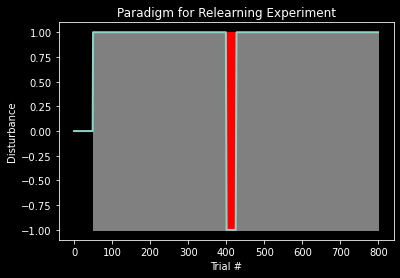

In [11]:
# Create data frame 
data = np.zeros([800,1])
design = pd.DataFrame(data = data, columns = ['disturbance'])
design['disturbance'][0:49] = 0 # null trials 
design['disturbance'][50:400] = 1 # adaptation trials 
design['disturbance'][401:426] = -1 # de-adaptation trials 
design['disturbance'][427:800] = 1 # re-adaptation trials

# Plot 
plt.figure()
plt.plot(design['disturbance'], linewidth=2)
plt.fill_between([50, 400], [1], [-1], color='gray')
plt.fill_between([401, 426], [1], [-1], color='red')
plt.fill_between([427, 800], [1], [-1], color='gray')
plt.xlabel('Trial #')
plt.ylabel('Disturbance')
plt.title('Paradigm for Relearning Experiment')
plt.show()

# Model 

In [12]:
def twoS_SSM(A_f, A_s, B_f, B_s):
  # INPUTS:
  # parameters of model 

  # Create data frame
  data = np.zeros([800,5])
  design_multi = pd.DataFrame(data = data, 
                              columns = ['disturbance', 'x', 'fast', 'slow', 'net'])
  design_multi['disturbance'] = design['disturbance']

  # ICs
  x_1 = 0 
  x_2 = 0

  # Simulate 
  for i in np.arange(0,799):
    # error 
    er = design_multi['disturbance'][i] - design_multi['net'][i]
    # fast
    design_multi['fast'][i+1] = (A_f * x_1) + (B_f * er)
    # slow
    design_multi['slow'][i+1] = (A_s * x_2) + (B_s * er)
    # net
    design_multi['net'][i+1] = design_multi['fast'][i+1] + design_multi['slow'][i+1]
    # update 
    x_1 = design_multi['fast'][i+1]
    x_2 = design_multi['slow'][i+1]

  # plot 
  plt.figure()
  plt.plot(design_multi['disturbance'], linewidth=2, label='perturbation')
  plt.plot(design_multi['fast'], linewidth=2, linestyle='--', label='fast')
  plt.plot(design_multi['slow'], linewidth=2, linestyle='--',label='slow')
  plt.plot(design_multi['net'], linewidth=2, label='net')
  plt.xlabel('Trial #')
  plt.title('Multi-Rate Model')
  plt.ylabel('Adaptation')
  plt.legend(loc='best')
  plt.show()



In [14]:
# Commonly used parameter values 
# A_f = 0.92
# A_s = 0.996
# B_f = 0.03
# B_s = 0.004

w = widgets.interact(twoS_SSM, A_f = (0,1,0.001), A_s = (0,1,0.001), B_f = (0,1,0.001), B_s = (0,1,0.001))

interactive(children=(FloatSlider(value=0.0, description='A_f', max=1.0, step=0.001), FloatSlider(value=0.0, d…